<a href="https://colab.research.google.com/github/Nivedha-5/Artificial-Human-and-Customer-Feedback-Segmentation-Apps/blob/main/Evaluate_Customers_Feedback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Uploading Datasets**

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn,length=len(uploaded[fn])))

Saving Customers_Reviews_Datasets.tsv to Customers_Reviews_Datasets.tsv
User uploaded file "Customers_Reviews_Datasets.tsv" with length 47285 bytes


**Data Facts**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Customers_Reviews_Datasets.tsv',  delimiter='\t',quoting = 3)
dataset.head()

,Coffee_Shop_Name,Review Title,Rating,Cat_Rate,Bool_HIGH,Tea_Rate,Service_Rate,Seating_Rate,Parking_Rate
0,Manana Coffee & Juice,Ottima qualità prezzo,5,HIGH,1,0,0,0,0
1,Brian's Brew,"By far, my best hotel in the world",4,HIGH,1,0,0,0,0
2,Flitch Coffee,First visit to the American Bar at the Savoy,4,HIGH,1,0,0,3,0
3,Third Coast Coffee Roasting Company,Nice stay,2,LOW,0,0,0,-1,-1
4,Kowabunga Coffee,Perfection,4,HIGH,1,0,0,0,0


In [ ]:
dataset.shape

(999, 9)

In [ ]:
dataset.info()

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,999.0,4.435435,0.897327,1.0,4.0,5.0,5.0,5.0
Bool_HIGH,999.0,0.880881,0.324091,0.0,1.0,1.0,1.0,1.0
Tea_Rate,999.0,0.033033,0.282967,-2.0,0.0,0.0,0.0,3.0
Service_Rate,999.0,0.389389,0.856150,-3.0,0.0,0.0,0.0,4.0
Seating_Rate,999.0,0.097097,0.449428,-3.0,0.0,0.0,0.0,3.0
Parking_Rate,999.0,0.003003,0.378520,-2.0,0.0,0.0,0.0,3.0


In [ ]:
len(dataset)

999

In [ ]:
dataset.isnull().sum()

Coffee_Shop_Name    933
Review Title          0
Rating                0
Cat_Rate              0
Bool_HIGH             0
Tea_Rate              0
Service_Rate          0
Seating_Rate          0
Parking_Rate          0
dtype: int64

**Data Distribution**

Percentage of Satisfication

1    88.09
0    11.91
Name: Bool_HIGH, dtype: float64


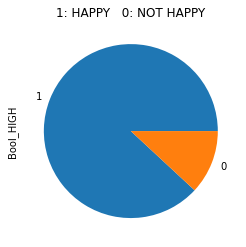

In [ ]:
### Satisfication chart of the customers ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage of Satisfication\n')
print(round(dataset.Bool_HIGH.value_counts(normalize=True)*100,2))
round(dataset.Bool_HIGH.value_counts(normalize=True)*100,2).plot(kind='pie')
plt.title('1: HAPPY   0: NOT HAPPY')
plt.show()

**Cleaning the Data**

In [ ]:
# First level cleaning techniques
import re
import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [ ]:
# Just check the updated data
dataset['cleaned_description'] = pd.DataFrame(dataset['Review Title'].apply(cleaned1))
dataset.head(20)

,Coffee_Shop_Name,Review Title,Rating,Cat_Rate,Bool_HIGH,Tea_Rate,Service_Rate,Seating_Rate,Parking_Rate,cleaned_description
0,Manana Coffee & Juice,Ottima qualità prezzo,5,HIGH,1,0,0,0,0,ottima qualità prezzo
1,Brian's Brew,"By far, my best hotel in the world",4,HIGH,1,0,0,0,0,by far my best hotel in the world
2,Flitch Coffee,First visit to the American Bar at the Savoy,4,HIGH,1,0,0,3,0,first visit to the american bar at the savoy
3,Third Coast Coffee Roasting Company,Nice stay,2,LOW,0,0,0,-1,-1,nice stay
4,Kowabunga Coffee,Perfection,4,HIGH,1,0,0,0,0,perfection
5,Legend Coffee,Staff stole from me!!,4,HIGH,1,0,0,0,-2,staff stole from me
6,Fleet Coffee,Great customer service and comfy bed,4,HIGH,1,0,0,2,0,great customer service and comfy bed
7,Holy Grounds,"Yes, it's really good!",5,HIGH,1,0,1,-1,0,yes its really good
8,Anderson's Coffee Company,Incredible,3,LOW,0,0,0,0,1,incredible
9,Apanas Coffee & Beer,Ottima scelta!,5,HIGH,1,0,0,0,0,ottima scelta


In [ ]:
#  Second level of cleaning techniques
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [ ]:
# Just check the new updated one
dataset['cleaned_description_new'] = pd.DataFrame(dataset['cleaned_description'].apply(cleaned2))
dataset.head(20)

,Coffee_Shop_Name,Review Title,Rating,Cat_Rate,Bool_HIGH,Tea_Rate,Service_Rate,Seating_Rate,Parking_Rate,cleaned_description,cleaned_description_new
0,Manana Coffee & Juice,Ottima qualità prezzo,5,HIGH,1,0,0,0,0,ottima qualità prezzo,ottima qualità prezzo
1,Brian's Brew,"By far, my best hotel in the world",4,HIGH,1,0,0,0,0,by far my best hotel in the world,by far my best hotel in the world
2,Flitch Coffee,First visit to the American Bar at the Savoy,4,HIGH,1,0,0,3,0,first visit to the american bar at the savoy,first visit to the american bar at the savoy
3,Third Coast Coffee Roasting Company,Nice stay,2,LOW,0,0,0,-1,-1,nice stay,nice stay
4,Kowabunga Coffee,Perfection,4,HIGH,1,0,0,0,0,perfection,perfection
5,Legend Coffee,Staff stole from me!!,4,HIGH,1,0,0,0,-2,staff stole from me,staff stole from me
6,Fleet Coffee,Great customer service and comfy bed,4,HIGH,1,0,0,2,0,great customer service and comfy bed,great customer service and comfy bed
7,Holy Grounds,"Yes, it's really good!",5,HIGH,1,0,1,-1,0,yes its really good,yes its really good
8,Anderson's Coffee Company,Incredible,3,LOW,0,0,0,0,1,incredible,incredible
9,Apanas Coffee & Beer,Ottima scelta!,5,HIGH,1,0,0,0,0,ottima scelta,ottima scelta
